# Assignment 1: Job Market Analysis

## Part 1 - Data Preperation and Preprocesing

In [21]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# Importing data
df = pd.read_csv("data.csv", low_memory=False)

In [23]:
# Display head of the data
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [24]:
# Display the shape of the dataset
print("DataFrame shape:\n")
print(df.shape)

DataFrame shape:

(318477, 13)


In [25]:
# Display the datatypes of each column
print("Column datatypes:\n")
print(df.dtypes)

Column datatypes:

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object


In [26]:
# Check for null values and display them
print("NULL values:\n")
print(df.isnull().sum())

NULL values:

Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
dtype: int64


In [27]:
# Simplifying date datatype
print("Change date datatype:\n")

print("Original:")
print(df['Date'][0],"\n")

# Changing date datatype
df['Date'] = df['Date'].astype('datetime64[ns]')

print("New:")
print(df['Date'][0])

Change date datatype:

Original:
2018-10-07T00:00:00.000Z 

New:
2018-10-07 00:00:00


In [28]:
# Seems like removing the IDs reveals a bunch of duplicate data so I've just commented this out for now.
""""
# Changing ID datatype

# Some IDs have not been entered correctly, eg: '37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676'
# Need to trim the first 8 characters before converting to int

df['Id'] = df['Id'].str[:8].astype('int64')
"""

'"\n# Changing ID datatype\n\n# Some IDs have not been entered correctly, eg: \'37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676\'\n# Need to trim the first 8 characters before converting to int\n\ndf[\'Id\'] = df[\'Id\'].str[:8].astype(\'int64\')\n'

In [29]:
# Remove the Id and FullDescription column
df = df.drop('Id', axis=1)
df = df.drop('FullDescription', axis=1)

In [30]:
# Removing duplicate data
print("Removing Duplicates:\n")

# Check for duplicates
print("No. of duplicates:", df[df.duplicated()].shape[0], "(before)")

# Remove duplicates:
df.drop_duplicates(inplace=True)

# Re-check for duplicates
print("No. of duplicates:", df[df.duplicated()].shape[0], "(after)")

Removing Duplicates:

No. of duplicates: 9991 (before)
No. of duplicates: 0 (after)


In [31]:
# How many jobs do we have in total?
total_jobs = df.shape[0]

# How many jobs have lowest salary equal to $0?
lowest_size = df[(df['LowestSalary'] == 0)].shape[0]

# How many jobs have highest salary equal to $999k?
highest_size = df[(df['HighestSalary'] == 999)].shape[0]

# How many jobs have both the highest and lowest salary ($0k - $999k)
both_size = df[(df['HighestSalary'] == 999) & (df['LowestSalary'] == 0)].shape[0]

print("Total jobs:", total_jobs, "\n")
      
print("Lowest $0 jobs: %d" % lowest_size)
print("(%.2f%% of jobs)\n" % (lowest_size / total_jobs * 100))
      
print("Highest $999k jobs: %d" % highest_size)
print("(%.2f%% of jobs)\n" % (highest_size / total_jobs * 100))

print("Both Lowest $0 and Highest $999k jobs: %d" % both_size)
print("(%.2f%% of jobs)" % (both_size / total_jobs * 100))

Total jobs: 308486 

Lowest $0 jobs: 60840
(19.72% of jobs)

Highest $999k jobs: 11027
(3.57% of jobs)

Both Lowest $0 and Highest $999k jobs: 0
(0.00% of jobs)


<font color='purple'><b>NOTE: Bit confused about why we convert 0k and 999k salaries to NaN.</b>      
I get that nobody could have a salary of 0k, but not really sure what we should be changing it to? There are 10,000+ entries that have a HighestSalary of 999k which might be normal given we have 300,000+ entries which is only 3% of them.</font>


<font color='purple'><b>NOTE: Not sure if it's going to cause problems but we seem to be getting NA values instead of NaN values when setting type as Int64</b>     
It seems when we convert the Highest and Lowest salary back into Int64 it gives us an NA value for all the NaN values. I tried fixing it by only applying the type update to notnull values but then it did some weird stuff and they all became float values. Also tried replacing the pd.NA valuyes with np.nan values but this didn't do anything either.</font>

In [32]:
# Just commented this out because I was a bit confused about it.
# The next cell I made tries to do somthing similar I think.
"""

# Change 'lowest salaries' that are 0 to NaN and 'highest salaries' that are 999 to NaN
df['LowestSalary'].replace({0: np.nan}, inplace=True)
df['HighestSalary'].replace({999: np.nan}, inplace=True)

# Multiply salary by 1000 because it is represented as 1 = 1k
df['LowestSalary'] = df['LowestSalary'] * 1000
df['HighestSalary'] = df['HighestSalary'] * 1000

# Convert columns back to numpy ints to account for the NaN values
df['LowestSalary'] = df['LowestSalary'].astype('Int64')
df['HighestSalary'] = df['HighestSalary'].astype('Int64')

# Trying to fix the <NA> problem
#df.loc[df['LowestSalary'].notnull(), 'LowestSalary'].astype('Int64')
#df.loc[df['HighestSalary'].notnull(), 'HighestSalary'].astype('Int64')

# df['LowestSalary'].replace(pd.NA, np.nan, inplace=True)
# df['HighestSalary'].replace(pd.NA, np.nan, inplace=True)

"""

"\n\n# Change 'lowest salaries' that are 0 to NaN and 'highest salaries' that are 999 to NaN\ndf['LowestSalary'].replace({0: np.nan}, inplace=True)\ndf['HighestSalary'].replace({999: np.nan}, inplace=True)\n\n# Multiply salary by 1000 because it is represented as 1 = 1k\ndf['LowestSalary'] = df['LowestSalary'] * 1000\ndf['HighestSalary'] = df['HighestSalary'] * 1000\n\n# Convert columns back to numpy ints to account for the NaN values\ndf['LowestSalary'] = df['LowestSalary'].astype('Int64')\ndf['HighestSalary'] = df['HighestSalary'].astype('Int64')\n\n# Trying to fix the <NA> problem\n#df.loc[df['LowestSalary'].notnull(), 'LowestSalary'].astype('Int64')\n#df.loc[df['HighestSalary'].notnull(), 'HighestSalary'].astype('Int64')\n\n# df['LowestSalary'].replace(pd.NA, np.nan, inplace=True)\n# df['HighestSalary'].replace(pd.NA, np.nan, inplace=True)\n\n"

In [33]:
# Creating column for average salary - (maybe useful not sure)

df.loc[df['LowestSalary'] == 0, 'LowestSalary'] = 10
# It would be a fair assumption that no salary is lower than $10,000 per year
# This reference says the lowest average is about $12,400 in Australia
# http://www.salaryexplorer.com/salary-survey.php?loc=13&loctype=1

# Create row for average salary (Mean of Lowest and Highest salary)
df['AvgSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# Multiply our salaries by 1000 (1 = 1k so we want 1 = 1000)
df['LowestSalary'] = df['LowestSalary'] * 1000
df['HighestSalary'] = df['HighestSalary'] * 1000
df['AvgSalary'] = df['AvgSalary'] * 1000

# Convert our AvgSalary from float -> int
df['AvgSalary'] = df['AvgSalary'].astype('Int64')

In [34]:
# See our new column
df.head(7)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,LowestSalary,HighestSalary,JobType,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,10000,30000,NaN,20000
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,10000,30000,NaN,20000
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,10000,30000,NaN,20000
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,10000,30000,NaN,20000
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",10000,30000,NaN,20000
5,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",10000,30000,NaN,20000
6,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,10000,30000,NaN,20000


In [35]:
# Remove area from titles and move to the area column
print("Number of Titles containing Area:", df['Title'].str.contains(' in ').sum())

df.loc[df['Area'].isnull(), 'Area'] = df['Title'].str.split(' in ').str[1]
df.loc[df['Title'].str.contains(' in '), 'Title'] = df['Title'].str.split(' in ').str[0]

print("Number of Titles containing Area:", df['Title'].str.contains(' in ').sum())

Number of Titles containing Area: 12093
Number of Titles containing Area: 0


In [36]:
# move JobType column up the dataframe so that all the salaries are together
cols = list(df)
cols.insert(8, cols.pop(cols.index('JobType')))
df = df.loc[:, cols]
df.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,JobType,LowestSalary,HighestSalary,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,10000,30000,20000
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,10000,30000,20000
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,10000,30000,20000
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,10000,30000,20000
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,10000,30000,20000


In [37]:
# We don't need to run this code here BUT we will filter out NaN values when we are analysing a specific factor
# e.g. When we are looking at Location, we can remove all the NaN location values just for that.

"""
df = df.dropna(subset='Location', axis = 0, how ='any')
"""

"\ndf = df.dropna(subset='Location', axis = 0, how ='any')\n"

In [38]:
# Normalising the data
df_norm = df # Create a copy of the DataFrame that will be using normalized values

columns_to_normalize = ['LowestSalary','HighestSalary','AvgSalary'] # Normalize our columns with int values

scaler = StandardScaler() # Declare the standard scaler for normalizing
df_norm[columns_to_normalize] = scaler.fit_transform(df_norm[columns_to_normalize]) # Fit and transform our data

In [39]:
# See our new normalized data
df_norm

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,JobType,LowestSalary,HighestSalary,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,-1.182472,-0.472942,-0.654908
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,-1.182472,-0.472942,-0.654908
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,-1.182472,-0.472942,-0.654908
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,-1.182472,-0.472942,-0.654908
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,-1.182472,-0.472942,-0.654908
...,...,...,...,...,...,...,...,...,...,...,...,...
318472,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,2.730323,4.987743,4.715280
318473,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,2.730323,4.987743,4.715280
318474,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,2.730323,4.987743,4.715280
318475,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,2.730323,4.987743,4.715280


### Dataset overview
< Will copy paste from documentation >

### Data preperation and preprosessing
< Will copy paste from documentation >

### Hypothesis
< Will copy paste from documentation >



## Part 2 - Data Analysis and Interpretation

### Job metadata
Extract the relevant information to describe the job’s
attributes.
For example:
- What is the sector, sub-sector of each job?
- Where is the location of the job?
- Which is the range of salaries for each job?

### Market by location
For example:
- What is the market size in each city? Which are the hottest job sectors in
each city?
- Which range of salary is common in each city? Where are the employees
more well-paid?
- Can you detect the pattern of posting: e.g. are more jobs posted at the
beginning of month?

### <font color='orange'>(WORK IN PROGRESS) </font>
Just playing around with different ways of data analysis to see what works

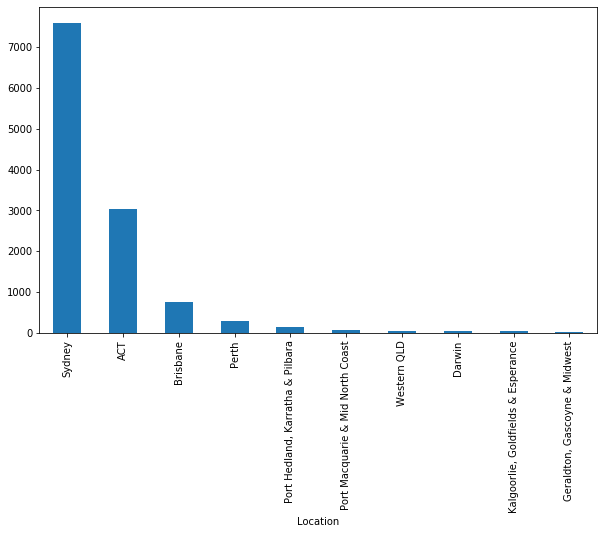

In [54]:
# Histograms

# - A histogram that shows the frequency of jobs in locations

# - A histogram that shows mean(AverageSalary) for each location


f, ax = plt.subplots(figsize=(10, 6))
# df.groupby('Location')['AvgSalary'].sum().sort_values(ascending=False).head(21).plot(kind='bar')
# f.autofmt_xdate()
# plt.show()


df.groupby('Location')['AvgSalary'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()


In [52]:
# Heat map

# Correlation
# pd.plotting.scatter_matrix(df_norm, alpha=0.2, figsize=(10,10))
# plt.show()

# yeah not sure about that one...

In [ ]:
# Regression test

### Market by sectors
For example:
- Which sectors keep the highest market share?
- In each sector, which sub-sectors are the main spotlights?
- What is the salary range for each sector/sub-sector? Can you compare salary
range between sectors/subsectors?
- What is the trending of market i.e. if a high school student ask you which
subject should he/she learn in the university (to guarantee a job in a future),
what is your advice?
- Can you detect which skills are required in each sector?

## Part 3 - Evaluation